In [1]:
import tensorflow as tf
import os
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt 
import matplotlib as mpl
from tqdm import tqdm
from sklearn.model_selection import train_test_split

2024-03-12 12:43:24.499824: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-12 12:43:24.500012: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-12 12:43:24.889471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-12 12:43:25.795154: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 12:43:33.884434: W tensorflow/compiler/tf2

In [2]:
image_path = []

for root,dirs,files in os.walk("./archive (2)/png_images"):
    for file in files:
        path= os.path.join(root,file)
        image_path.append(path)
image_path.sort()
print(len(image_path))

mask_path =[]
for root,dirs,files in os.walk("./archive (2)/png_masks"):
    for file in files:
        path= os.path.join(root,file)
        mask_path.append(path)
    
mask_path.sort()
print(len(mask_path))

1000
1000


In [3]:
images = []

for path in tqdm(image_path):
    file = tf.io.read_file(path)
    image = tf.image.decode_png(file,channels=3,dtype=tf.uint8)
    images.append(image)

masks = []

for path in tqdm(mask_path):
    file = tf.io.read_file(path)
    mask = tf.image.decode_png(file,channels=1,dtype=tf.uint8)
    masks.append(mask)


  0%|          | 0/1000 [00:00<?, ?it/s]2024-03-12 12:43:59.698402: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 12:44:02.503764: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-12 12:44:02.504692: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Docum

In [4]:
images[0]

<tf.Tensor: shape=(825, 550, 3), dtype=uint8, numpy=
array([[[221, 217, 206],
        [221, 217, 206],
        [222, 218, 207],
        ...,
        [ 54,  45,  38],
        [ 54,  45,  38],
        [ 54,  45,  38]],

       [[222, 218, 207],
        [222, 218, 207],
        [223, 219, 208],
        ...,
        [ 55,  46,  37],
        [ 55,  46,  37],
        [ 55,  46,  37]],

       [[222, 218, 207],
        [223, 219, 208],
        [224, 220, 209],
        ...,
        [ 56,  47,  38],
        [ 56,  47,  38],
        [ 56,  47,  38]],

       ...,

       [[172, 173, 175],
        [173, 174, 176],
        [173, 174, 176],
        ...,
        [177, 174, 183],
        [177, 174, 183],
        [175, 172, 181]],

       [[171, 172, 174],
        [167, 168, 170],
        [160, 161, 163],
        ...,
        [176, 174, 185],
        [175, 173, 184],
        [173, 171, 182]],

       [[165, 166, 168],
        [161, 162, 164],
        [154, 155, 157],
        ...,
        [176, 176, 18

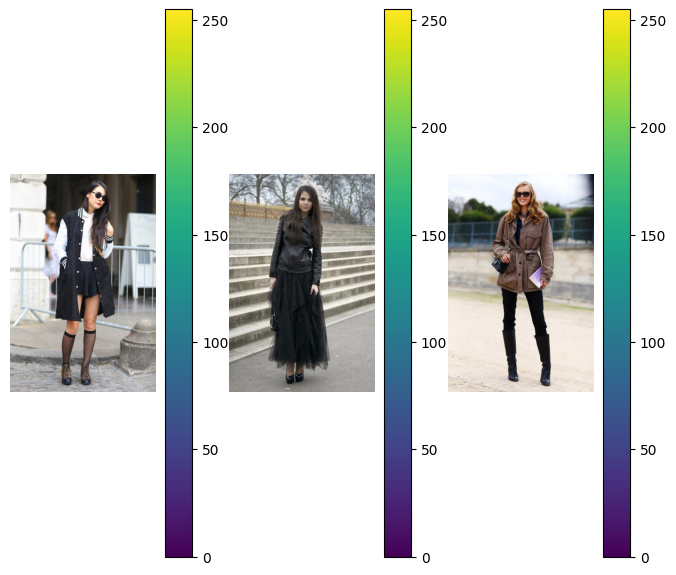

In [5]:
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    img=images[i]
    plt.imshow(img)
    plt.colorbar()
    plt.axis('off')

plt.show()

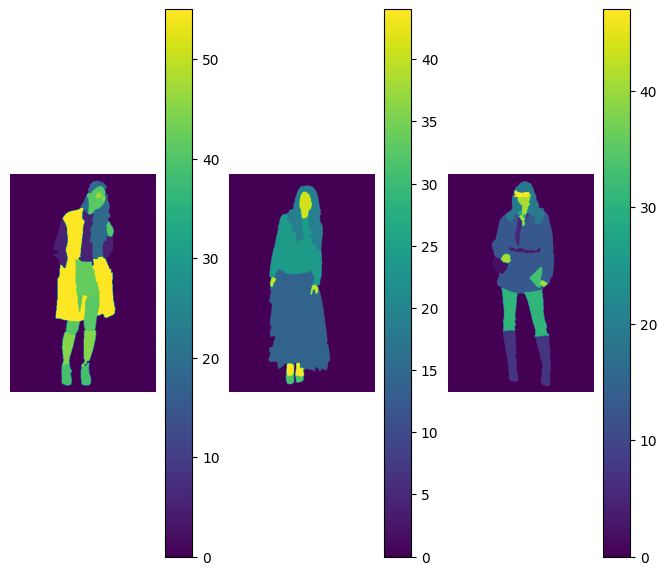

In [6]:
plt.figure(figsize=(8,8))
for i in range(3):
    plt.subplot(1,3,i+1)
    img=masks[i]
    plt.imshow(img)
    plt.colorbar()
    plt.axis('off')

plt.show()

In [7]:
def resize_image(image):
    image = tf.cast(image,tf.float32)
    image = image/255.0
    image = tf.image.resize(image,(128,128))
    return image

def resize_mask(mask):
    mask = tf.image.resize(mask,(128,128))
    mask = tf.cast(mask,tf.uint8)
    return mask

x = [resize_image(i) for i in images]
y = [resize_mask(i) for i in masks]
len(x),len(y)

(1000, 1000)

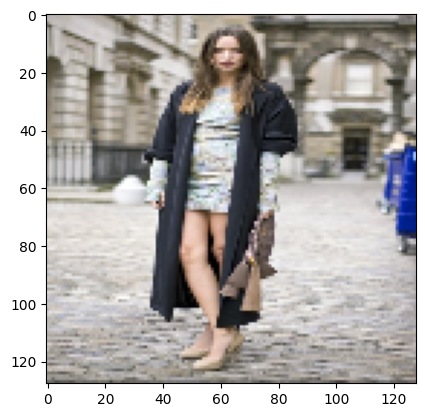

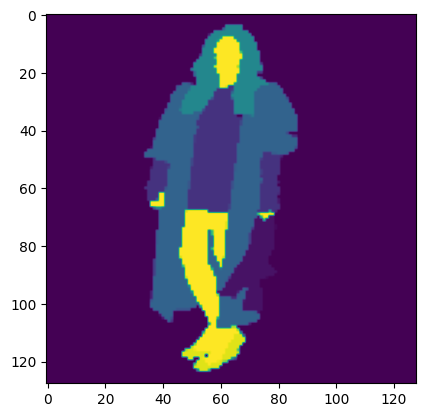

In [8]:
plt.imshow(x[40])
plt.show()

plt.imshow(y[40])
plt.show()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
import numpy as np
np.array(x_train).shape

(800, 128, 128, 3)

In [10]:
x_train=tf.data.Dataset.from_tensor_slices(x_train)
x_test=tf.data.Dataset.from_tensor_slices(x_test)
y_train=tf.data.Dataset.from_tensor_slices(y_train)
y_test=tf.data.Dataset.from_tensor_slices(y_test)


2024-03-12 12:45:20.687888: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 157286400 exceeds 10% of free system memory.
2024-03-12 12:45:20.934327: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 39321600 exceeds 10% of free system memory.
2024-03-12 12:45:21.060861: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13107200 exceeds 10% of free system memory.


In [11]:
x_train.element_spec

TensorSpec(shape=(128, 128, 3), dtype=tf.float32, name=None)

In [16]:
BATCH=10
AT= tf.data.AUTOTUNE
BUFFER=10

train=tf.data.Dataset.zip((x_train,y_train))
val=tf.data.Dataset.zip((x_test,y_test))


In [17]:
train=train.cache().shuffle(BATCH).batch(BATCH).repeat()
val=val.batch(BATCH)

In [18]:
base = keras.applications.DenseNet121(
    input_shape=(128,128,3),
    include_top=False,
    weights="imagenet"
)

In [19]:
skip_names=["conv1/relu","pool2_relu","pool3_relu","pool4_relu","relu"]


In [20]:
skip_outputs = [ base.get_layer(name).output for name in skip_names]

downstack = keras.Model(inputs=base.input,outputs=skip_outputs)

downstack.trainable = False

In [21]:
base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 134, 134, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']

In [22]:
downstack.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 134, 134, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']      

In [23]:
from tensorflow_examples.models.pix2pix import pix2pix
upstack =  [pix2pix.upsample(512,3),pix2pix.upsample(256,3),pix2pix.upsample(128,3),pix2pix.upsample(64,3)]

In [24]:
input = keras.layers.Input(shape=(128,128,3))
down = downstack(input)

In [25]:
down

[<KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'model')>,
 <KerasTensor: shape=(None, 32, 32, 256) dtype=float32 (created by layer 'model')>,
 <KerasTensor: shape=(None, 16, 16, 512) dtype=float32 (created by layer 'model')>,
 <KerasTensor: shape=(None, 8, 8, 1024) dtype=float32 (created by layer 'model')>,
 <KerasTensor: shape=(None, 4, 4, 1024) dtype=float32 (created by layer 'model')>]

In [26]:
out = down[-1]
out

<KerasTensor: shape=(None, 4, 4, 1024) dtype=float32 (created by layer 'model')>

In [27]:
skips= reversed(down[:-1])


In [28]:
for up,skip in zip(upstack,skips):
    out=up(out)
    out= keras.layers.Concatenate()([out,skip])
    

In [29]:
out= keras.layers.Conv2DTranspose(59,3,strides=2,padding="same")(out)

In [30]:
unet= keras.Model(inputs=input,outputs=out)
unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 model (Functional)          [(None, 64, 64, 64),         7037504   ['input_3[0][0]']             
                              (None, 32, 32, 256),                                                
                              (None, 16, 16, 512),                                                
                              (None, 8, 8, 1024),                                                 
                              (None, 4, 4, 1024)]                                                 
                                                                                            

In [31]:
def compile_model():
    unet.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
                 metrics=["accuracy"])

In [32]:
compile_model()

In [33]:
train1 = unet.fit(train,validation_data=val,epochs=20,verbose=1,steps_per_epoch=100,validation_steps=50)

2024-03-12 12:48:10.958824: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 157286400 exceeds 10% of free system memory.
2024-03-12 12:48:11.573793: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13107200 exceeds 10% of free system memory.


Epoch 1/20


2024-03-12 12:48:23.596466: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-12 12:48:34.780927: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-12 12:48:34.786929: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-12 12:48:34.816965: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.60GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be

100/100 [==============================] - 48s 120ms/step - loss: 1.3584 - accuracy: 0.7453 - val_loss: 1.1968 - val_accuracy: 0.7837
Epoch 2/20
100/100 [==============================] - 8s 81ms/step - loss: 0.7336 - accuracy: 0.8101
Epoch 3/20
100/100 [==============================] - 8s 81ms/step - loss: 0.6415 - accuracy: 0.8313
Epoch 4/20
100/100 [==============================] - 8s 81ms/step - loss: 0.5781 - accuracy: 0.8438
Epoch 5/20
100/100 [==============================] - 8s 81ms/step - loss: 0.5248 - accuracy: 0.8575
Epoch 6/20
100/100 [==============================] - 8s 81ms/step - loss: 0.4759 - accuracy: 0.8713
Epoch 7/20
100/100 [==============================] - 8s 80ms/step - loss: 0.4428 - accuracy: 0.8806
Epoch 8/20
100/100 [==============================] - 8s 80ms/step - loss: 0.4010 - accuracy: 0.8917
Epoch 9/20
100/100 [==============================] - 8s 80ms/step - loss: 0.3694 - accuracy: 0.8997
Epoch 10/20
100/100 [==============================] - 8s 

In [34]:
downstack.trainable=True

compile_model()

In [35]:
train2 = unet.fit(train,validation_data=val,epochs=20,verbose=1,steps_per_epoch=100,validation_steps=50)

Epoch 1/20


2024-03-12 12:53:15.883758: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 10.00MiB (rounded to 10485760)requested by op model_1/sequential_3/conv2d_transpose_3/conv2d_transpose
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-03-12 12:53:15.883910: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-03-12 12:53:15.883933: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 127, Chunks in use: 125. 31.8KiB allocated for chunks. 31.2KiB in use in bin. 7.1KiB client-requested in use in bin.
2024-03-12 12:53:15.883952: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 525, Chunks in use: 523. 270.5KiB allocated for chunks. 269.5KiB in use in bin. 265.2KiB

ResourceExhaustedError: Graph execution error:

Detected at node model_1/sequential_3/conv2d_transpose_3/conv2d_transpose defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/varaprasad/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1077, in launch_instance

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/varaprasad/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 529, in dispatch_queue

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 518, in process_one

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 424, in dispatch_shell

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 766, in execute_request

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 429, in do_execute

  File "/home/varaprasad/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/varaprasad/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/varaprasad/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/varaprasad/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/varaprasad/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/varaprasad/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/varaprasad/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_5171/1590886296.py", line 1, in <module>

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/conv2d_transpose.py", line 296, in call

  File "/home/varaprasad/.local/lib/python3.10/site-packages/keras/src/backend.py", line 6268, in conv2d_transpose

OOM when allocating tensor with shape[10,64,64,64] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/sequential_3/conv2d_transpose_3/conv2d_transpose}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_85642]

1/1 [==============================] - 0s 38ms/step


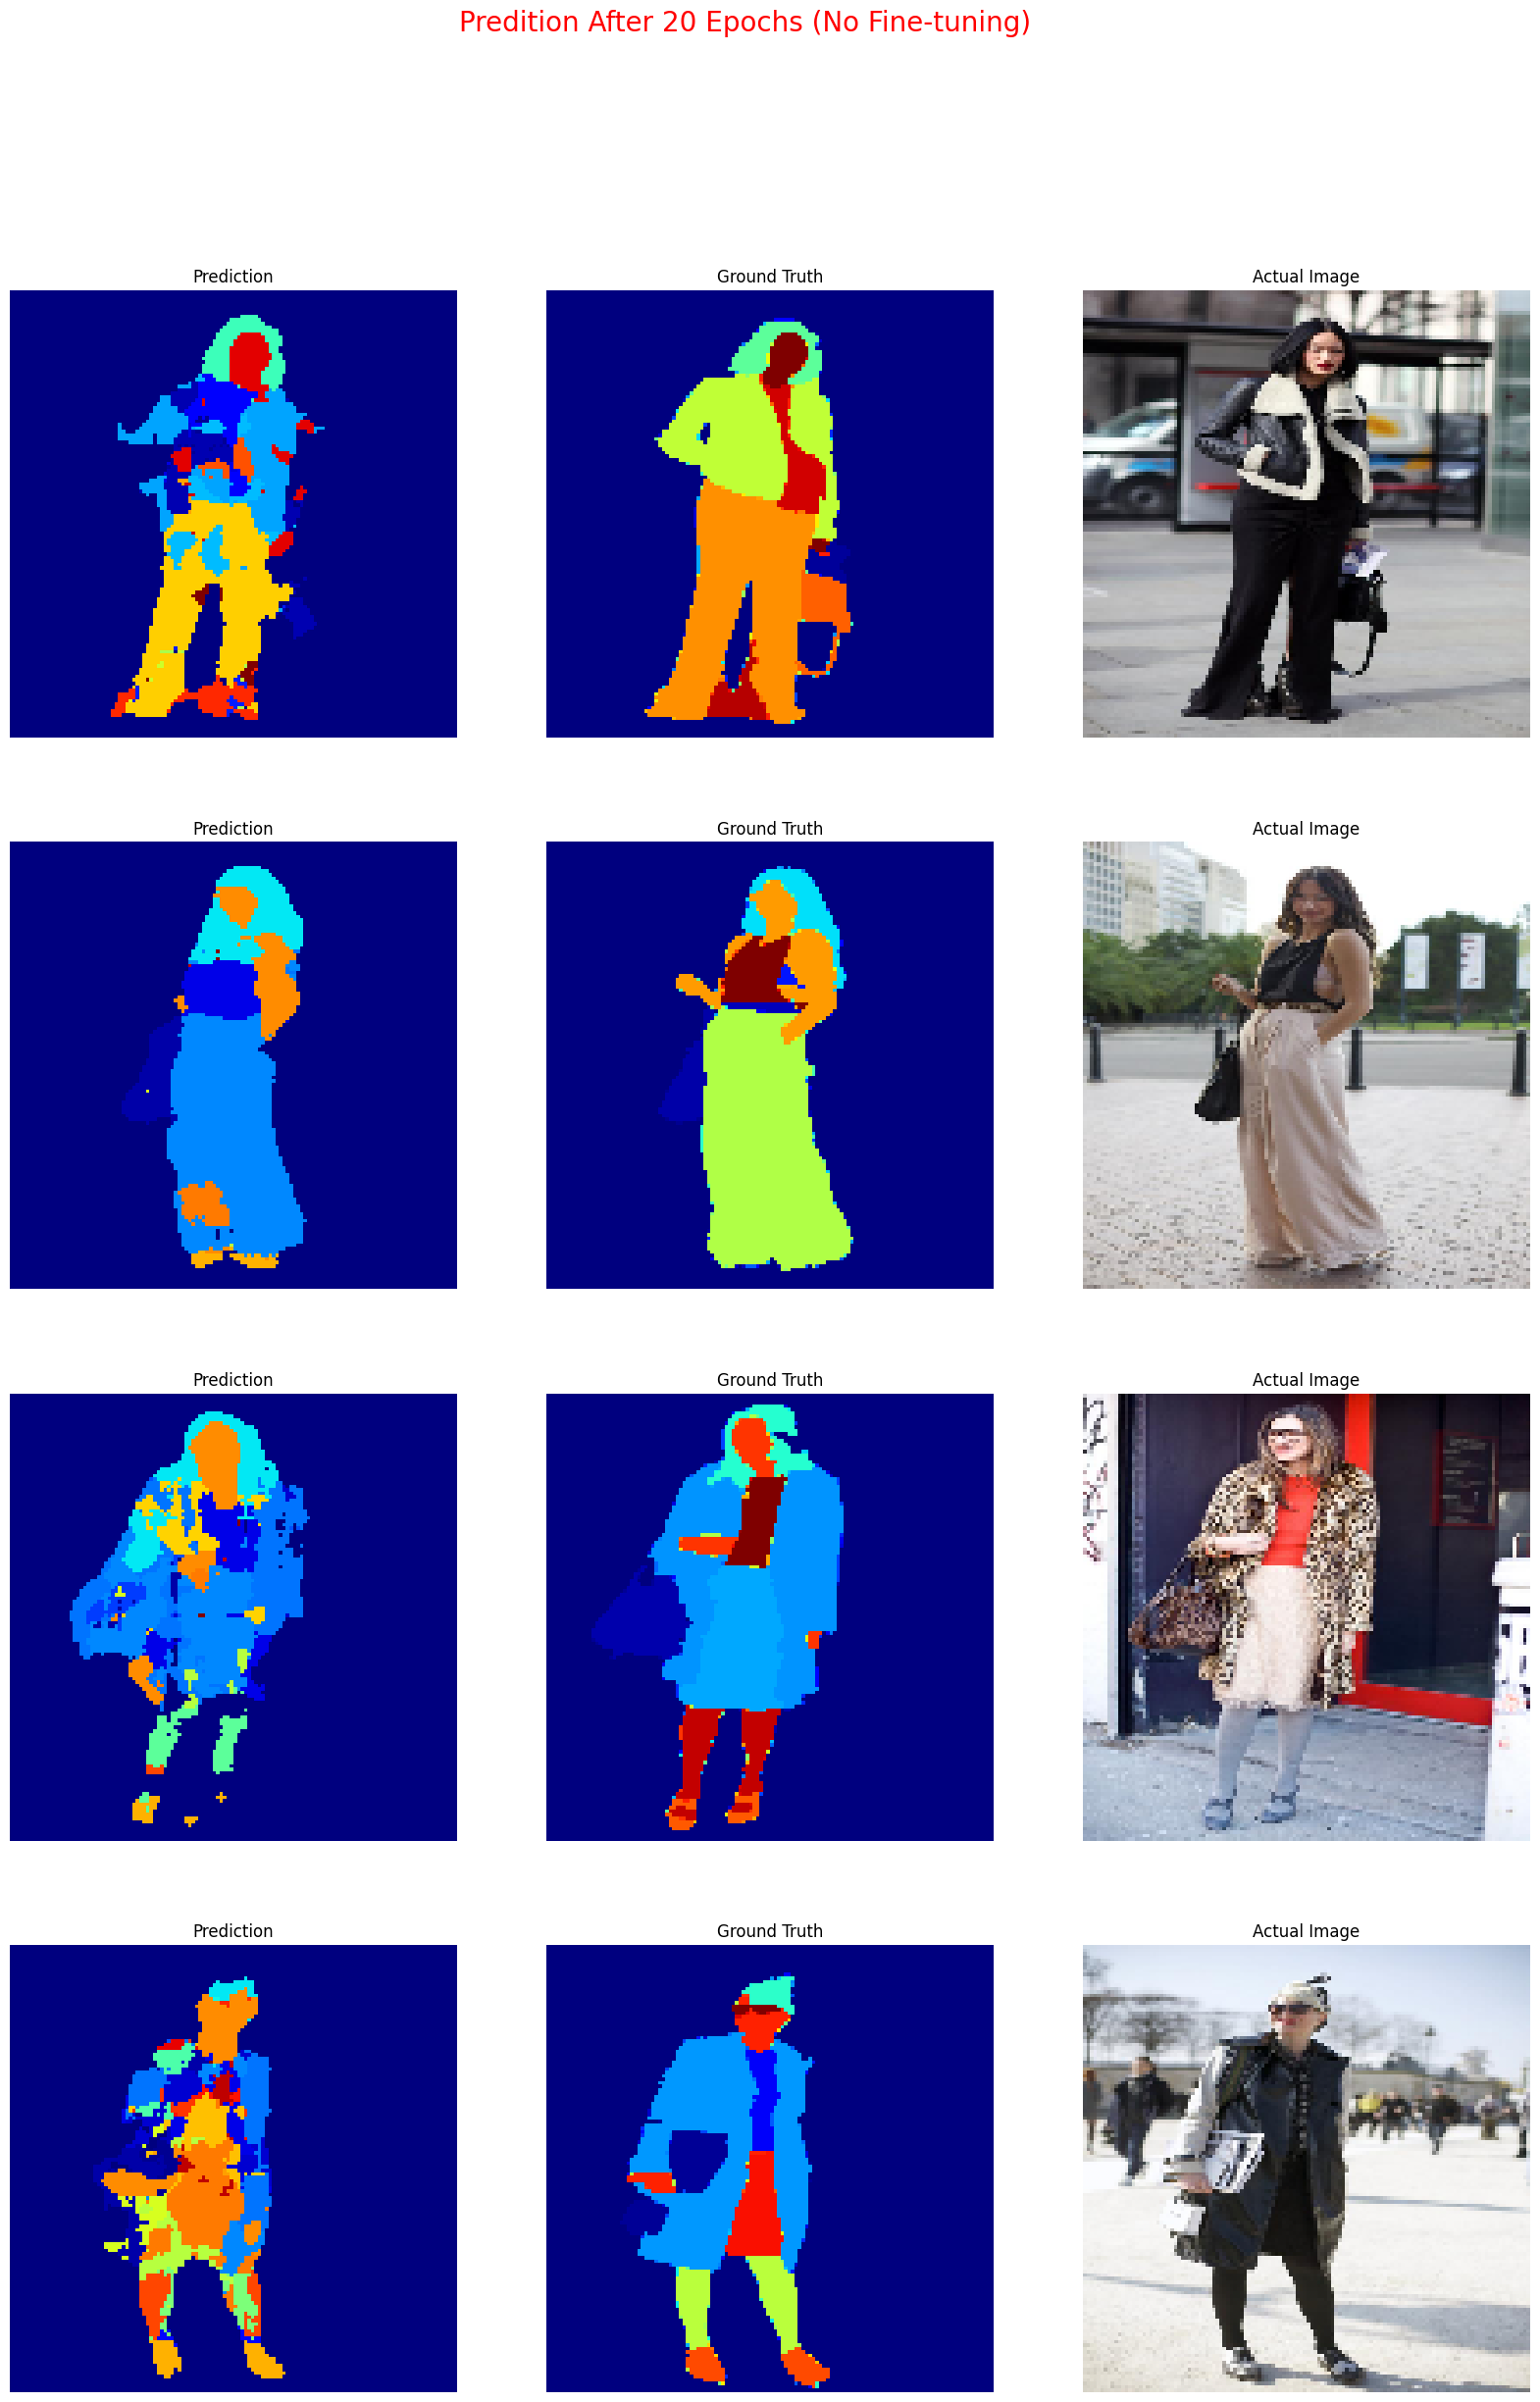

: 

In [33]:
# select a validation data batch
img, mask = next(iter(val))
# make prediction
pred = unet.predict(img)
plt.figure(figsize=(20,28))

k = 0
for i in pred:
    # plot the predicted mask
    plt.subplot(4,3,1+k*3)
    i = tf.argmax(i, axis=-1)
    plt.imshow(i,cmap='jet')
    plt.axis('off')
    plt.title('Prediction')
    
    # plot the groundtruth mask
    plt.subplot(4,3,2+k*3)
    plt.imshow(mask[k], cmap='jet')
    plt.axis('off')
    plt.title('Ground Truth')

    # plot the actual image
    plt.subplot(4,3,3+k*3)
    plt.imshow(img[k])
    plt.axis('off')
    plt.title('Actual Image')
    k += 1
    if k == 4: break
plt.suptitle('Predition After 20 Epochs (No Fine-tuning)', color='red', size=20)  
plt.show()


In [ ]:
unet.save("imageseg.h5")